In [ ]:
\begin{}
\title{Fysikklab}
\author{Olve Birkeland, Linn Elise Klingenberg, Cornelius Levai, Erik Mathias Silnes, Ketis Sivanesarajah}

\end{}

In [ ]:
# 1.3 Teori (Linn)

\subtitle{Teori}
\subsubtitle{Utledning fra lov om energibevarelse}
\section{
    Siden energi ikke kan oppstå eller forsvinne, men 
}
\subsubtitle{Utledning fra Newtons 2. lov}
\section{
    Newtons 2. lov sier at summen av et systems ytre krefter er lik systemets masse ganget med akselerasjonen. \begin{equation}
        \sum F = m \times a
    \end{equation}
    
    Dersom en ser kreftene som virker i høyden og setter inn for F får vi \begin {equation}
        N - mg cos(\beta) = m \times a\prep
\end{equation} 
Der N er normalkraften, m er massen, g er gravitasjonskonstanten og \beta er helningsvinkelen, altså vinkelen mellom underlaget og referansekoordinatsystemet, samt a\prep er sentripetalakselerasjonen. Sentripetalakselerasjonen er gitt ved \begin {equation} 
    a\prep = v^2 /R
    a\prep = v^2 \kappa
\end



}

# Fysikklabb
### 


# Metode (Ketis)

## forsøk 
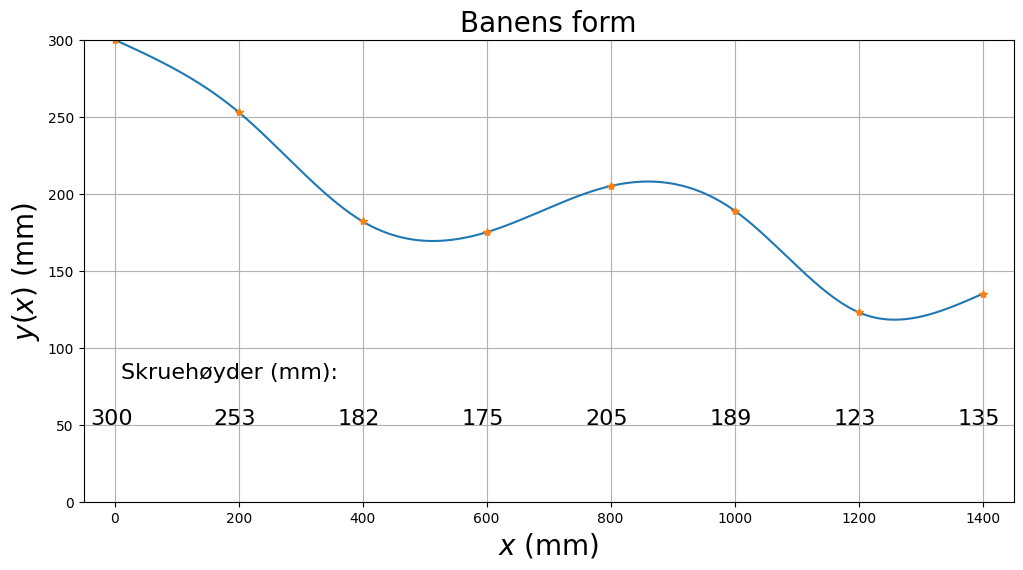
**figur x:** oppsett ab baneform med mål.

En kompakt gummikule med massen m = 37g som slippes fra en bestemt høyde og går igjennom banen som ble bestemt i kodeblokk 186. Bevegelsen til kulen blir filmet 10 ganger og videoene blir puttet inn i programmet Tracker. I Tracker bruker vi verktøyet *Calibrium Stick* for å definere 1 meter, og putter koordinatsystemet nederst til venstre i banen. I Tracker bruker vi verktøyet *Point Mass Autotracker* for å spore bevegelsen til gummikula og få farten og posisjonen til kula gjennom banen. Vi tok ut sluttfarten og tiden den brukte for å komme seg igjennom banen og brukte de opplysningene til analysen. 

Målingene fra Tracker ble brukt til beregningene av tap av mekanisk energi. 



# Resultater ()
## Simulering
Det ble brukt numerisk analyse for å få en modell på hvordan kulen ville bevege seg gjennom kulebanen. Banen ble satt opp ved å benytte seg av startverdien 300 også generere tilfeldige tall som skapte en bane. Alle beregningene ble gjort ved å lage pythonskript for å gjøre utregningene og plotte grafene. 



Beregnet rulltid, slutthastighet og kinetisk energi i sluttpunktet.
M˚alt rulletid, slutthastighet, kinetisk energi i sluttpunktet og tap i
mekanisk energi oppgis med middelverdi og standardfeil. Resultatavsnittet
inneholder ogs˚a (som et minimum) disse figurene:
– Beregnet baneform y(x) sammen med m˚alt y(x) for et av rulleforsøkene
– Beregnet fart v(x) sammen med m˚alt v(x) for et av rulleforsøkene
– Beregnet friksjonskraft f(x)
– Beregnet normalkraft N(x)
– Beregnet forhold |f(x)/N(x)|


## Eksperiment
Resultatene funnet i den eksprimentetlle delen ble funnet slik det er representert i metode delen, hvor tallene er hentet fra verktøyet 'Tracker'.

#### Rulltid
Ved bruk av 'Tracker' brukte vi 'gjennomsnitt_rulletid()' (fra Apendix linje x) til å finne gjennomsnittsfarten fra de 10 forskjellige forsøkene. Ved kjøring av koden fikk vi at den gjennomsnittlige rulletiden var tilnærmet lik 1.52 sekunder. Vi sammenlignet dettte med 'finn_tid()' (fra Apendix linje x), som viser den teoretiske tiden kulen skulle brukt. Da fikk vi ut at den teoretiske tiden var tilnærmet lik 2.57 sekunder, som gir oss et avik på 1.05 sekunder. Dette peker til at det enentuelt ligger en feil  til stede siden 1 sekund avik ikke er neglisjerbart.

#### Slutthastighet
Ved lignende metode som ved funnet av rulletid fant vi sluttfarten til kulen ved bruk av 'Tracker'. Vi puttet deretter de 10 verdiene inn i funksjoenen 'gjennomsnitt_sluttfart()' (fra Apendix linje x) og fant at basert på eksprimentet så er den gjennomsnittlige sluttfarten tilnærmet lik 1.36 m/s. Den teoretiske sluttfarten ble funnet ved å sette 'y = cs(1401)' og putte dette inn i funksjonen 'finn_farten(y)' (fra Apendix linje x). Resultatet for den teoretiske sluttfarten ble tilnærmet lik 1.52 m/s, som gir et avik på 0.16 m/s. 

#### Kinetisk energi i sluttpunkt
Den kinetiske energien ble funnet ved bruk av funksjonen 'total_kinetisk()' (fra Apendix linje x) og slutt fart verdiene funnet fra 'Tracker'. Den gjennomsnittlige totale kinetiske energi igjen i kulen når sluttfarten ble målt var 3.89 * 10^-6 J. 

(Skal r brukes og m satt til 0.31, tror funksjoene burde sees over, tror også den ene er i mm/s mens den andre er i m/s)

#### Tap av mekanisk energi




# Diskusjon (Olve)